<a href="https://colab.research.google.com/github/sigvehaug/2020-LLIF-R/blob/master/2-Example-Medical-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, 2021-09-06, University of Bern, Sigve Haug


# 2. Example of a small medical data analysis with Python

(Use 45 minutes to go through this notebook on colab)
 
 In this notebook we will step by step see how to do a simple data analysis with Python. We will see how to
* read in in comma separated value data (text or excel files)
* use Dataframes for preprocessing and cleaning of data
* use Dataframes for descriptive statistics
* use Dataframes for plotting
* save data and results to a file

In the next session we will then cover the Python and programming language concepts we have been using.


## Read in a small medical dataset with blood pressure measurements

Some colleagues provided this blood pressure [dataset](https://drive.google.com/file/d/1d8x5ZSwa9Yn-8J8NxiygFDaoMO8PRNWc/view?usp=sharing). Follow the link and take a look. If you don't understand what the columns mean, you can study this [webpage](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).


In Python not all software libraries, called modules, are in memory. So we need to import those we need for our data analysis.

In [1]:
# The data analysis module containing DataFrames
import pandas as pd
# The .....


In [43]:
# Create a variable with the download link of the data file on google drive
# and create a dataframe varible (object) into which we read the data
url  = 'https://drive.google.com/uc?export=download&id=1d8x5ZSwa9Yn-8J8NxiygFDaoMO8PRNWc'
data = pd.read_csv(url)
data


,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,#NULL!,60
1,76.22,0,150,77
2,70.28,0,115,72
3,100.28,1,183,82
4,61.62,0,#NULL!,#NULL!
...,...,...,...,...
95,93.16,1,#NULL!,#NULL!
96,62.69,0,133,72
97,79.45,1,200,70
98,86.94,1,149,54


In [5]:
pd.set_option('max_rows',None)

In [9]:
#data

In [39]:
pd.set_option('max_rows',20)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Sex     100 non-null    int64  
 2   BP_SYS  100 non-null    object 
 3   BP_DIA  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [12]:
data.describe()

,Age,Sex
count,100.000000,100.000000
mean,70.165700,0.460000
std,15.152183,0.500908
...,...,...
50%,71.945000,0.000000
75%,81.302500,1.000000
max,100.810000,1.000000


In [13]:
round(data,2)

,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,#NULL!,60
1,76.22,0,150,77
2,70.28,0,115,72
...,...,...,...,...
97,79.45,1,200,70
98,86.94,1,149,54
99,81.09,1,175,88


## Data Cleaning

We seem to have a problem with the blood pressure columns. They contain rows with #NULL. Pandas dataframes have ways to handle that.

In [45]:
clean_data = data.replace('#NULL!',float(0))
clean_data['BP_SYS'] = pd.to_numeric(clean_data['BP_SYS'])
clean_data['BP_DIA'] = pd.to_numeric(clean_data['BP_DIA'])
clean_data['BP_SYS'] = clean_data['BP_SYS'].replace(float(0),clean_data['BP_SYS'].mean())
clean_data['BP_DIA'] = clean_data['BP_DIA'].replace(float(0),clean_data['BP_DIA'].mean())
clean_data

,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,103.42,60.00
1,76.22,0,150.00,77.00
2,70.28,0,115.00,72.00
3,100.28,1,183.00,82.00
4,61.62,0,103.42,57.53
...,...,...,...,...
95,93.16,1,103.42,57.53
96,62.69,0,133.00,72.00
97,79.45,1,200.00,70.00
98,86.94,1,149.00,54.00


## Plotting

Now that we can study the summary statistics we also want to study the distributions.

AttributeError: ignored

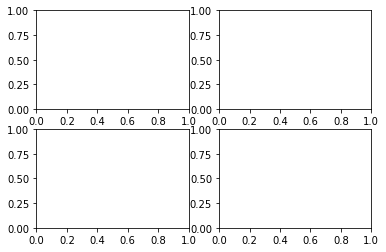

In [59]:
# Histograms
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2)
clean_data['Age'].plot(kind='hist', ax=axes[0])
#clean_data['Sex'].plot(kind='hist')
#clean_data['BP_SYS'].plot(kind='hist')
#clean_data['BP_DIA'].plot(kind='hist')
#plt.tight_layout()
plt.show()

## Descriptive Statistics


In [47]:
round(clean_data.describe(),2)

,Age,Sex,BP_SYS,BP_DIA
count,100.00,100.00,100.00,100.00
mean,70.17,0.46,133.41,73.64
std,15.15,0.50,29.43,16.66
min,22.08,0.00,90.00,47.00
25%,57.93,0.00,103.42,57.53
50%,71.94,0.00,131.50,72.00
75%,81.30,1.00,151.00,85.00
max,100.81,1.00,212.00,135.00


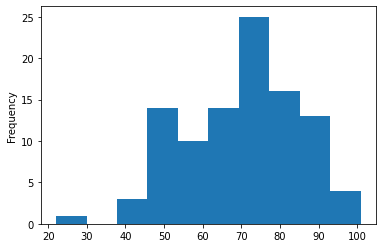

In [50]:
# Histogram distributions and correlations
clean_data['Age'].plot(kind='hist')

## Inferential Statistics

Normality test, test if female and males are different?

## Saving Results

Save raw and clean data, descriptive stats and plots to a new folder.

Now lets us look at the programming concepts we have used in a more formal way. Please go to the next notebook !